In [1]:
import geopandas as gpd
import networkx as nx
import momepy
from cityseer.tools import mock, graphs, plot, io
from shapely import wkb
import matplotlib.pyplot as plt

In [3]:
# Load data
gpkg = "C:\\Users\\jperez\\Documents\\Current 1\\emc2\\Output\\output.gpkg"
gdf_lines = gpd.read_file(gpkg, layer="splited_lines")

# Multilines to singlelines
gdf_lines = gdf_lines.explode(index_parts=True)

<Figure size 600x600 with 0 Axes>

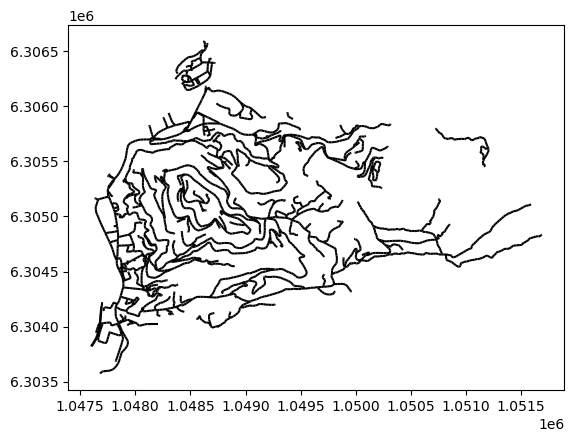

In [4]:
# Plot the road network
plt.figure(figsize=(6, 6))
gdf_lines.plot(color="k")
plt.show()

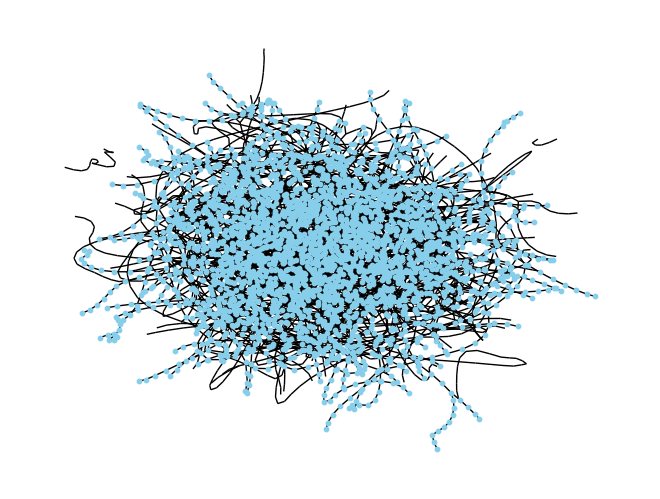

In [5]:
# Network graph based on its abstract representation in the NetworkX format
G = momepy.gdf_to_nx(gdf_lines, approach='primal')
# Plot the graph
nx.draw(G, with_labels=False, node_size=10, node_color='skyblue')
nx.draw_networkx_edges(G, pos=nx.spring_layout(G), edge_color='black')
# Display the plot
plt.show()

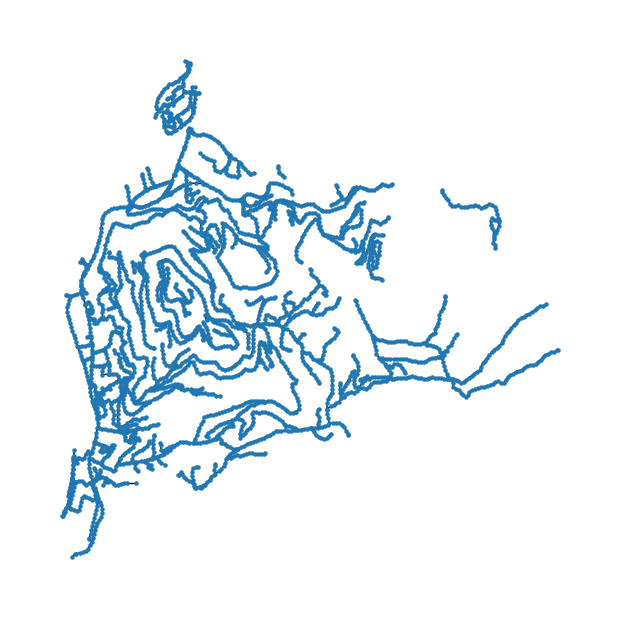

In [12]:
positions = {n: [n[0], n[1]] for n in list(G.nodes)}
# Plot the network graph
plt.figure(figsize=(6, 6))
nx.draw(G, positions, node_size=5)
plt.show()

INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 1.
100%|██████████| 3155/3155 [00:00<00:00, 280449.91it/s]
INFO:cityseer.tools.io:Preparing node and edge arrays from networkX graph.
100%|██████████| 3081/3081 [00:00<00:00, 5718.42it/s]
INFO:cityseer.tools.plot:Preparing graph nodes
INFO:cityseer.tools.plot:Preparing graph edges
100%|██████████| 3155/3155 [00:00<00:00, 18431.61it/s]


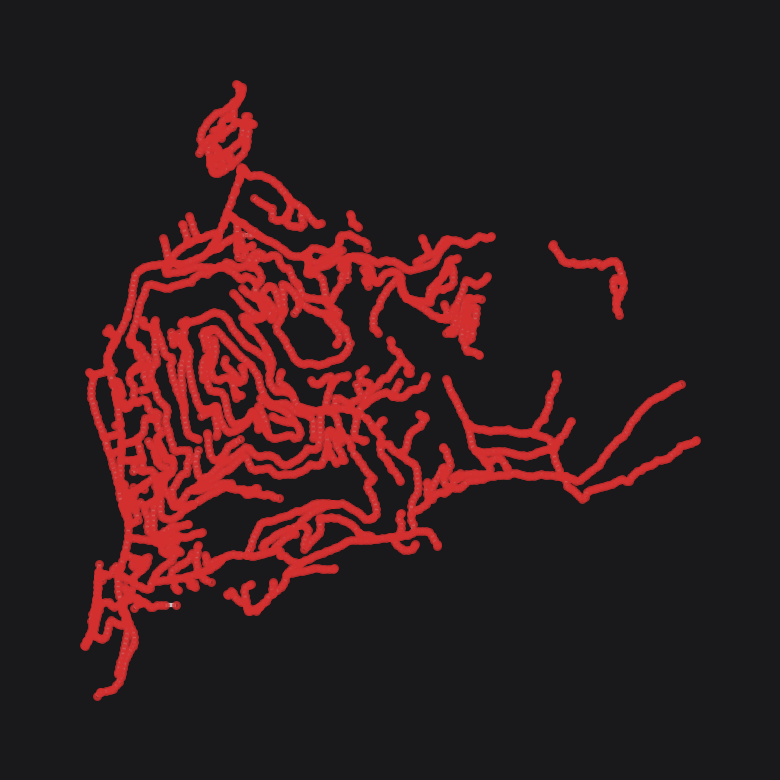

In [13]:
nx_momepy = io.nx_from_generic_geopandas(gdf_lines)

nodes_gdf, edges_gdf, network_structure = io.network_structure_from_nx(
    nx_momepy, crs=gdf_lines.crs.to_epsg()
)

plot.plot_nx(nx_momepy, labels=False, node_size=5, dpi=200, figsize=(4, 4))